In [1]:
# Dependencies
import pandas as pd
import numpy as np
from pathlib import Path

# Import
import os

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_one = Path("../project-1-group17/global-data.csv")
raw_df = pd.read_csv(file_one, encoding="UTF-8")
raw_df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [4]:
# drop Renewables (% equivalent primary energy) 
# Financial flows to developing countries (US $) null/zero values assumed to be zero 
# repleaced nulls with zeros on Renewable-electricity-generating-capacity-per-capita
# Dropping Density (density\n(P/Km2) over concerns of accuracy and relevance 
new_data_df = raw_df.drop(columns=["Renewables (% equivalent primary energy)"])
new_data_df.info()
#Questions for Prof/TA
# Do we need the data to have the same number of data points? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [5]:
# drop Renewables (% equivalent primary energy) 
new_data_df = raw_df.drop(columns=["Renewables (% equivalent primary energy)"])
new_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [6]:
# Financial flows to developing countries (US $) null/zero values assumed to be zero 
mask = pd.isna(new_data_df["Financial flows to developing countries (US $)"])
new_data_df.loc[mask, "Financial flows to developing countries (US $)"] = 0

new_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    3649 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [7]:
mask = pd.isna(new_data_df["Renewable-electricity-generating-capacity-per-capita"])
new_data_df.loc[mask, "Renewable-electricity-generating-capacity-per-capita"] = 0

print(new_data_df['Renewable-electricity-generating-capacity-per-capita'].tail())

3644    62.88
3645    62.33
3646    82.53
3647    81.40
3648    80.61
Name: Renewable-electricity-generating-capacity-per-capita, dtype: float64


In [8]:
file_two = Path("../project-1-group17/countriescontinents.csv")
continent_data = pd.read_csv(file_two, encoding="UTF-8")
continent_data.head()


,Continent,Entity
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [9]:
new_data_df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,0.0,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [10]:
new_data_df.corr(numeric_only=True)

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
Year,1.000000,0.124890,0.073292,0.086321,0.109810,-0.029384,0.032615,-0.004820,0.073935,0.030126,0.004196,-0.161605,0.024759,-0.192566,0.135399,-0.001629,0.003507,0.000944
Access to electricity (% of population),0.124890,1.000000,0.866554,0.147251,-0.025445,-0.784514,0.123999,0.128713,0.138057,-0.151062,0.454870,-0.252949,0.126988,-0.112071,0.418459,0.054964,0.420548,-0.102857
Access to clean fuels for cooking,0.073292,0.866554,1.000000,0.083259,-0.053580,-0.791740,0.100752,0.163473,0.124486,-0.120110,0.551347,-0.194884,0.095629,-0.145301,0.545165,0.074630,0.432700,-0.131847
Renewable-electricity-generating-capacity-per-capita,0.086321,0.147251,0.083259,1.000000,0.045997,0.113385,0.017690,-0.047461,0.098788,0.327388,-0.081174,-0.023792,0.018405,0.017826,-0.125714,0.035178,-0.169534,-0.027171
Financial flows to developing countries (US $),0.109810,-0.025445,-0.053580,0.045997,1.000000,0.064814,0.101776,-0.009954,0.096883,0.021199,-0.096170,-0.004829,0.106098,0.040992,-0.093223,0.102777,-0.062102,0.021674
Renewable energy share in the total final energy consumption (%),-0.029384,-0.784514,-0.791740,0.113385,0.064814,1.000000,-0.134888,-0.136525,-0.068779,0.467862,-0.429362,0.247050,-0.132715,0.075236,-0.370648,-0.045395,-0.330140,0.018284
Electricity from fossil fuels (TWh),0.032615,0.123999,0.100752,0.017690,0.101776,-0.134888,1.000000,0.646716,0.845067,-0.063773,0.105529,0.030998,0.989741,0.020956,0.107793,0.627682,0.110994,0.045413
Electricity from nuclear (TWh),-0.004820,0.128713,0.163473,-0.047461,-0.009954,-0.136525,0.646716,1.000000,0.492011,0.071715,0.180833,-0.007496,0.598495,-0.048455,0.231349,0.473280,0.177961,-0.087111
Electricity from renewables (TWh),0.073935,0.138057,0.124486,0.098788,0.096883,-0.068779,0.845067,0.492011,1.000000,0.091451,0.119760,0.009425,0.856270,-0.002531,0.139674,0.704884,0.112833,-0.016380
Low-carbon electricity (% electricity),0.030126,-0.151062,-0.120110,0.327388,0.021199,0.467862,-0.063773,0.071715,0.091451,1.000000,-0.119386,0.047489,-0.054515,-0.015196,0.007945,0.044866,-0.029134,-0.045336


In [11]:
# Group the data by country and calculate the mean renewable energy share
grouped_data = new_data_df.groupby("Entity")["Renewable energy share in the total final energy consumption (%)"].mean()

# Sort the countries based on the mean renewable energy share in descending order
sorted_data = grouped_data.sort_values(ascending=False)

# Display the top 10 countries with the highest renewable energy share
top_10_countries = sorted_data.head(10)
print(top_10_countries)

Entity
Somalia                     93.8005
Uganda                      93.0705
Ethiopia                    93.0030
Burundi                     92.4315
Central African Republic    91.8745
Bhutan                      88.9885
Guinea-Bissau               88.2055
Liberia                     88.0370
Rwanda                      87.6675
Zambia                      86.8955
Name: Renewable energy share in the total final energy consumption (%), dtype: float64


Index(['Renewable energy share in the total final energy consumption (%)'], dtype='object')


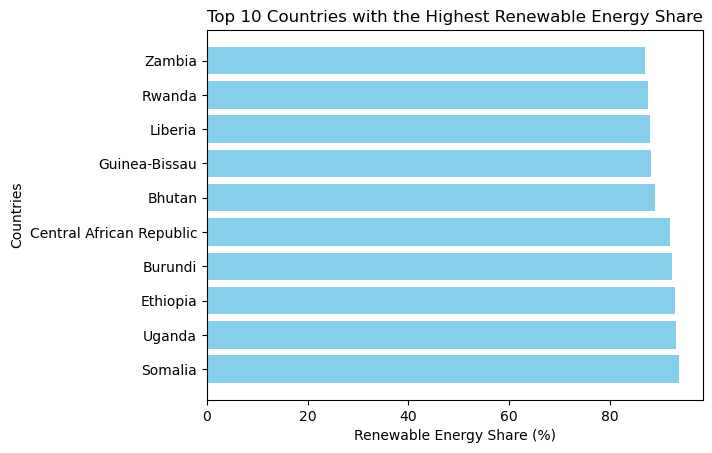

In [12]:
# Convert the Series to a DataFrame
top_10_countries_df = top_10_countries.to_frame()

# Print the column names to verify the exact column name
print(top_10_countries_df.columns)

# Create a figure and axis
fig, ax = plt.subplots()

# Replace 'Correct_Column_Name_Here' with the actual column name for renewable energy share
column_name = "Renewable energy share in the total final energy consumption (%)"

# Plot the top 10 countries with the highest renewable energy share
ax.barh(top_10_countries_df.index, top_10_countries_df[column_name], color='skyblue')

# Set labels and title
ax.set_xlabel('Renewable Energy Share (%)')
ax.set_ylabel('Countries')
ax.set_title('Top 10 Countries with the Highest Renewable Energy Share')

# Display the plot
plt.show()

In [13]:
# Group the data by country and calculate the mean renewable energy share
grouped_data = new_data_df.groupby("Entity")["Renewable energy share in the total final energy consumption (%)"].mean()

# Sort the countries based on the mean renewable energy share in ascending order
sorted_data = grouped_data.sort_values(ascending=True)

# Drop duplicates to avoid repeating countries
unique_sorted_data = sorted_data.drop_duplicates()

# Display the bottom 10 countries with the lowest renewable energy share
bottom_10_countries = unique_sorted_data.head(10)
print(bottom_10_countries)

Entity
Oman                    0.0000
Cayman Islands          0.0055
Kuwait                  0.0065
Saudi Arabia            0.0120
Turkmenistan            0.0680
Qatar                   0.0720
Nauru                   0.1340
United Arab Emirates    0.1465
Antigua and Barbuda     0.2005
Algeria                 0.2870
Name: Renewable energy share in the total final energy consumption (%), dtype: float64


Index(['Renewable energy share in the total final energy consumption (%)'], dtype='object')


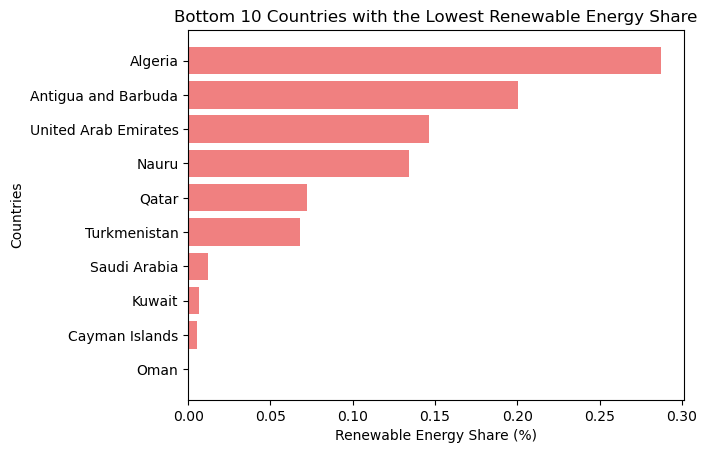

In [14]:
# Convert the Series to a DataFrame
bottom_10_countries_df = bottom_10_countries.to_frame()

# Print the column names to verify the exact column name
print(bottom_10_countries_df.columns)

# Create a figure and axis
fig, ax = plt.subplots()

# Replace 'Correct_Column_Name_Here' with the actual column name for renewable energy share
column_name = "Renewable energy share in the total final energy consumption (%)"

# Plot the bottom 10 countries with the lowest renewable energy share
ax.barh(bottom_10_countries_df.index, bottom_10_countries_df[column_name], color='lightcoral')

# Set labels and title
ax.set_xlabel('Renewable Energy Share (%)')
ax.set_ylabel('Countries')
ax.set_title('Bottom 10 Countries with the Lowest Renewable Energy Share')

# Display the plot
plt.show()

In [15]:
# Sort the DataFrame by the "Financial flows to developing countries (US $)" column in descending order
top_10_countries_financial_flows = new_data_df.sort_values(by="Financial flows to developing countries (US $)", ascending=False).drop_duplicates("Entity").head(10)

# Display the top 10 countries with the highest financial flows
print("Top 10 countries with the highest financial flows to developing countries:")
print(top_10_countries_financial_flows[["Entity", "Financial flows to developing countries (US $)"]])


Top 10 countries with the highest financial flows to developing countries:
         Entity  Financial flows to developing countries (US $)
2447    Nigeria                                    5.202310e+09
1143   Ethiopia                                    4.284370e+09
2531   Pakistan                                    3.386850e+09
997     Ecuador                                    2.811680e+09
119   Argentina                                    2.472850e+09
1550      India                                    2.112780e+09
1025      Egypt                                    2.070240e+09
3622     Zambia                                    1.791180e+09
3431     Uganda                                    1.470000e+09
751    Colombia                                    1.454760e+09


In [16]:
top_10_countries_financial_flows.head(30)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
2447,Nigeria,2017,54.400000,8.7,11.21,5.202310e+09,82.32,25.06,0.00,7.72,23.550947,2358.80800,6.31,1.085000e+05,0.805887,1968.565398,226,923768.0,9.081999,8.675277
1143,Ethiopia,2009,23.690039,1.9,16.91,4.284370e+09,94.18,0.42,0.00,3.55,89.420654,434.64044,13.85,6.530000e+03,8.802553,380.569003,115,1104300.0,9.145000,40.489673
2531,Pakistan,2017,70.790000,44.8,44.33,3.386850e+09,42.09,91.08,8.11,32.39,30.779753,4348.82960,4.65,1.988300e+05,5.554277,1464.926195,287,796095.0,30.375321,69.345116
997,Ecuador,2010,97.462140,93.6,156.29,2.811680e+09,11.79,9.77,0.00,9.00,47.948853,10353.47300,3.47,3.725000e+04,3.525299,4633.591284,71,283561.0,-1.831239,-78.183406
119,Argentina,2014,100.000000,99.7,248.74,2.472850e+09,9.79,92.18,5.26,34.37,30.066004,22881.00600,3.40,1.796000e+05,-2.512615,12334.798250,17,2780400.0,-38.416097,-63.616672
1550,India,2016,89.217800,51.4,68.18,2.112780e+09,33.02,1155.52,37.90,208.21,17.558842,6184.24950,4.54,2.195250e+06,8.256306,1732.554242,464,3287263.0,20.593684,78.962880
1025,Egypt,2017,100.000000,99.9,39.42,2.070240e+09,5.10,181.31,0.00,15.53,7.889657,10471.64550,3.67,NaN,NaN,NaN,103,1001450.0,26.820553,30.802498
3622,Zambia,2015,31.100000,14.0,145.55,1.791180e+09,83.09,0.36,0.00,13.00,97.305390,3115.06760,7.41,4.960000e+03,2.920375,1338.290927,25,752618.0,-13.133897,27.849332
3431,Uganda,2013,13.900000,0.8,20.90,1.470000e+09,92.55,0.14,0.00,2.45,94.594600,651.41376,10.34,3.690000e+03,3.586906,810.090395,229,241038.0,1.373333,32.290275
751,Colombia,2016,98.400000,90.7,246.63,1.454760e+09,30.74,25.02,0.00,49.54,66.443140,11435.30300,2.58,8.268000e+04,2.087383,5870.777957,46,1138910.0,4.570868,-74.297333


In [17]:
#Questions for Prof/TA
# Do we need the data to have the same number of data points? 


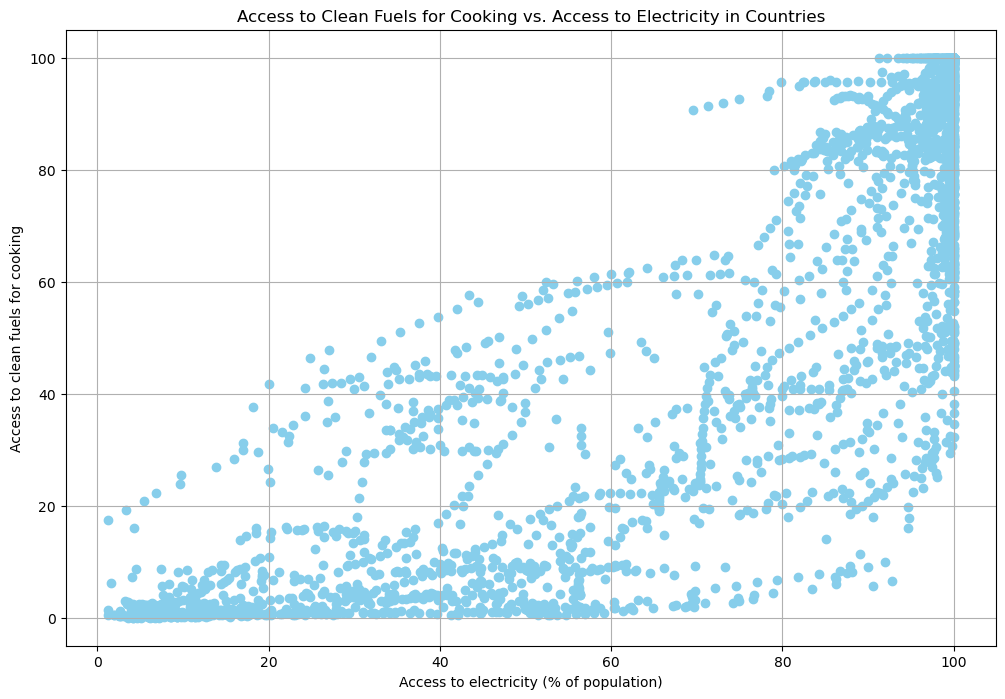

In [18]:
# Sort the DataFrame based on access to electricity (% of population)
access_to_elec_sorted = new_data_df.sort_values('Access to electricity (% of population)', ascending=False)

# Visualize the data
plt.figure(figsize=(12, 8))
plt.scatter(access_to_elec_sorted['Access to electricity (% of population)'], access_to_elec_sorted['Access to clean fuels for cooking'], color='skyblue')
plt.xlabel('Access to electricity (% of population)')
plt.ylabel('Access to clean fuels for cooking')
plt.title('Access to Clean Fuels for Cooking vs. Access to Electricity in Countries')
plt.grid(True)
plt.show()

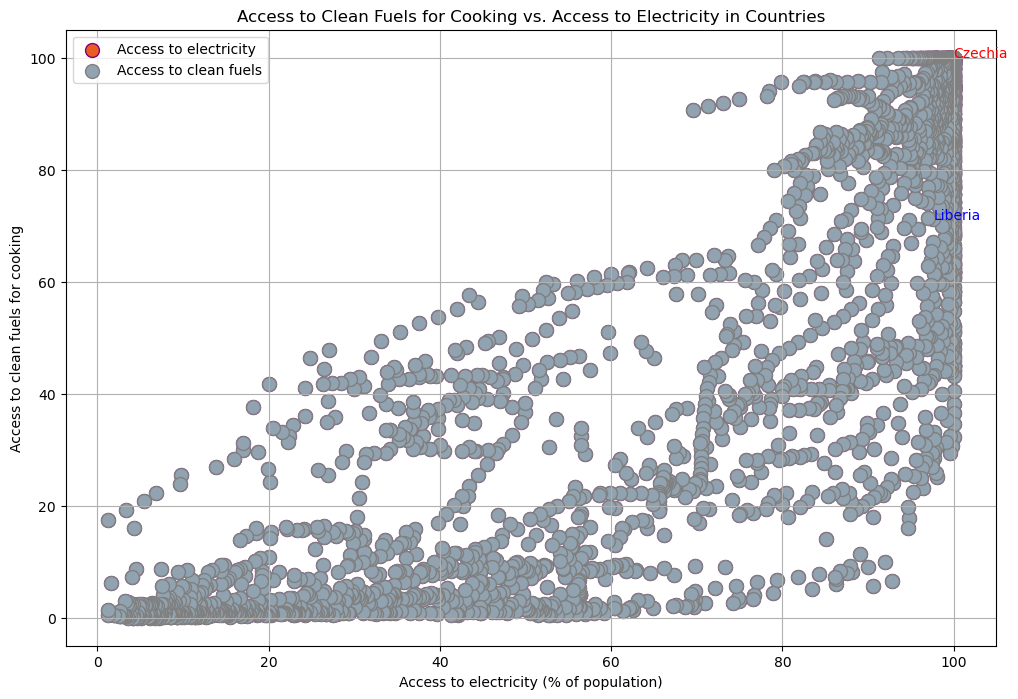

<Figure size 640x480 with 0 Axes>

In [19]:
# Sort the DataFrame based on access to electricity (% of population)
access_to_elec_sorted = new_data_df.sort_values('Access to electricity (% of population)', ascending=False)

# Visualize the data
plt.figure(figsize=(12, 8))

# Scatter plot for 'Access to electricity (% of population)' in orange
plt.scatter(access_to_elec_sorted['Access to electricity (% of population)'], access_to_elec_sorted['Access to clean fuels for cooking'], edgecolors='purple', s=100, color='#EA5C1F', label='Access to electricity')

# Scatter plot for 'Access to clean fuels for cooking' in grey
plt.scatter(access_to_elec_sorted['Access to electricity (% of population)'], access_to_elec_sorted['Access to clean fuels for cooking'], edgecolors='grey', s=100, color='#91A3B0', label='Access to clean fuels')

plt.xlabel('Access to electricity (% of population)')
plt.ylabel('Access to clean fuels for cooking')
plt.title('Access to Clean Fuels for Cooking vs. Access to Electricity in Countries')
plt.grid(True)
plt.legend()

# Find and annotate the leader country in red
leader_index = access_to_elec_sorted.index[0]
leader_country = access_to_elec_sorted.loc[leader_index, 'Entity']
plt.annotate(leader_country, (access_to_elec_sorted['Access to electricity (% of population)'].iloc[leader_index], access_to_elec_sorted['Access to clean fuels for cooking'].iloc[leader_index]), color='red')

# Find and annotate the worst country in blue at the exact position
worst_index = access_to_elec_sorted.index[-1]
worst_country = access_to_elec_sorted.loc[worst_index, 'Entity']
plt.annotate(worst_country, (access_to_elec_sorted['Access to electricity (% of population)'].iloc[worst_index], access_to_elec_sorted['Access to clean fuels for cooking'].iloc[worst_index]), color='blue')
plt.show()

# Define the output directory where you want to save the image
output_dir = "project-1-group17/Project Graphs"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the figure
plt.savefig(os.path.join(output_dir,'Access to Clean Fuels vs Electricity'))

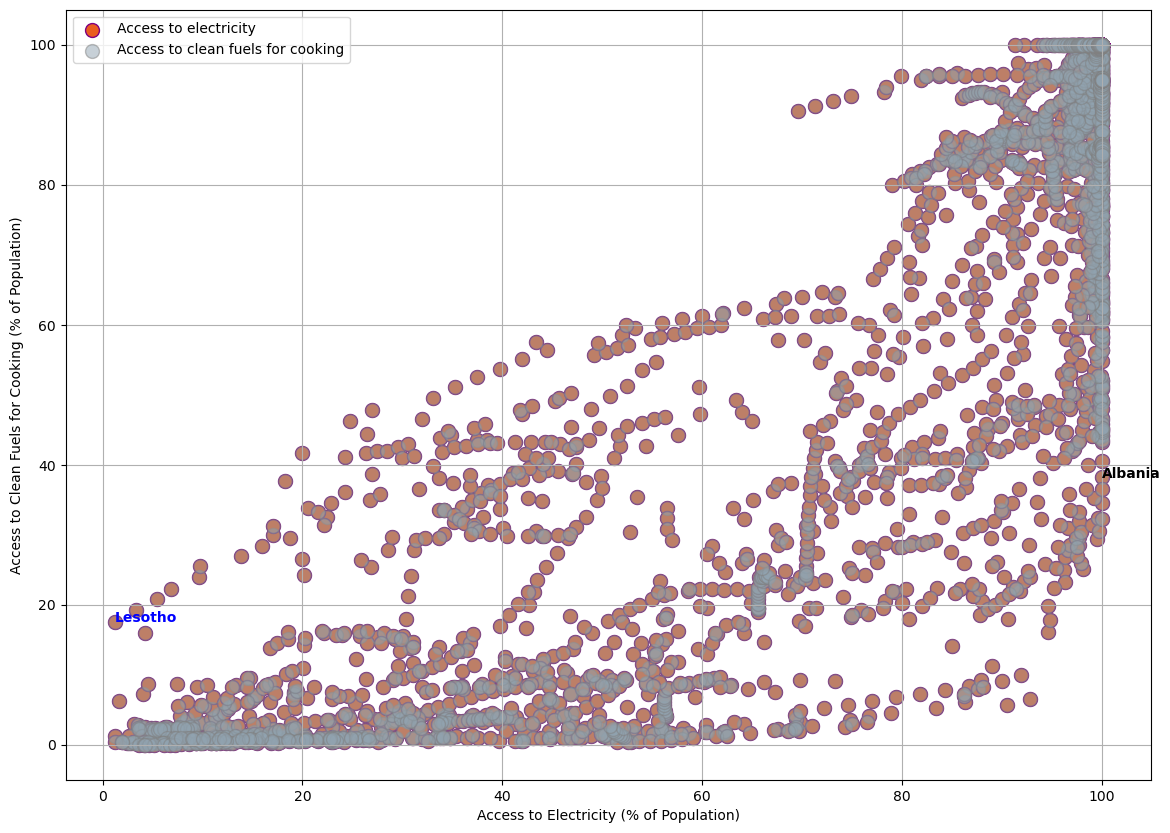

In [75]:
# Filter out rows with NaN values in either 'Access to electricity (% of population)' or 'Access to clean fuels for cooking'
data_cleaned = new_data_df.dropna(subset=['Access to electricity (% of population)', 'Access to clean fuels for cooking'])

# Extract necessary data for plotting
x_values = data_cleaned['Access to electricity (% of population)']
y_values = data_cleaned['Access to clean fuels for cooking']
countries = data_cleaned['Entity']

# Find the leading country based on max value
leader_country = countries[data_cleaned['Access to electricity (% of population)'].idxmax()]
leader_x = x_values.max()
leader_y = y_values[data_cleaned['Access to electricity (% of population)'].idxmax()]

# Find the lowest country based on min value
worst_country = countries[data_cleaned['Access to electricity (% of population)'].idxmin()]
worst_x = x_values.min()
worst_y = y_values[data_cleaned['Access to electricity (% of population)'].idxmin()]

# Create figure and set size
plt.figure(figsize=(14, 10))

# Scatter plot for 'Access to electricity (% of population)' in orange
plt.scatter(x_values, y_values, c='#EA5C1F', edgecolors='purple', s=100, label='Access to electricity')

# Scatter plot for 'Access to clean fuels for cooking' in grey
plt.scatter(x_values, y_values, c='#91A3B0', edgecolors='grey', s=100, label='Access to clean fuels for cooking', alpha=0.5)

plt.xlabel('Access to Electricity (% of Population)')
plt.ylabel('Access to Clean Fuels for Cooking (% of Population)')
# plt.title('Access to Clean Fuels for Cooking vs. Access to Electricity in Countries')
plt.grid(True)
plt.legend()

# Annotate the leader country in red
plt.annotate(leader_country, (leader_x, leader_y), color='black', weight='bold')

# Annotate the lowest country in blue
plt.annotate(worst_country, (worst_x, worst_y), color='blue', weight='bold')

# Create the output directory if it doesn't exist
output_dir = "project-1-group17/Project Graphs"
os.makedirs(output_dir, exist_ok=True)

# Save the figure
plt.savefig(os.path.join(output_dir, 'Access to Clean Fuels vs Electricity.png'))
plt.show()

In [76]:
# new_data_df structure: ['Entity', 'Access to electricity (% of population)', ...]

# Step 1: Filter countries with 100% access to electricity
countries_with_100_access = new_data_df[new_data_df['Access to electricity (% of population)'] == 100]

# Step 2: Drop duplicates based on the 'Entity' column
unique_countries_with_100_access = countries_with_100_access.drop_duplicates(subset='Entity')

# Step 3: Sort the DataFrame alphabetically by 'Entity'
sorted_unique_countries_with_100_access = unique_countries_with_100_access.sort_values(by='Entity')

# Step 4: Select relevant columns
top_countries = sorted_unique_countries_with_100_access[['Entity', 'Access to electricity (% of population)']]

# Print the sorted list of unique countries with 100% access to electricity
#print(top_countries)
top_countries.info

<bound method DataFrame.info of                     Entity  Access to electricity (% of population)
21                 Albania                                    100.0
86     Antigua and Barbuda                                    100.0
119              Argentina                                    100.0
127                Armenia                                    100.0
148                  Aruba                                    100.0
...                    ...                                      ...
3460  United Arab Emirates                                    100.0
3481        United Kingdom                                    100.0
3502         United States                                    100.0
3543               Uruguay                                    100.0
3558            Uzbekistan                                    100.0

[102 rows x 2 columns]>

In [77]:
# new_data_df structure: ['Entity', 'Access to electricity (% of population)', ...]

# Step 1: Filter countries with less than 2% access to electricity
countries_with_least_access = new_data_df[new_data_df['Access to electricity (% of population)'] < 2]

# Step 2: Drop duplicates based on the 'Entity' column
unique_countries_with_least_access = countries_with_least_access.drop_duplicates(subset='Entity')

# Step 3: Sort the filtered data alphabetically by 'Entity'
sorted_unique_countries_with_least_access = unique_countries_with_least_access.sort_values(by='Entity')

# Step 4: Select relevant columns
bottom_countries = sorted_unique_countries_with_least_access[['Entity', 'Access to electricity (% of population)']]

# Print the sorted list of unique countries with less than 2% access to electricity
print(bottom_countries)

             Entity  Access to electricity (% of population)
0       Afghanistan                                 1.613591
1410  Guinea-Bissau                                 1.253706
1871        Lesotho                                 1.252269
1899        Liberia                                 1.279290
3053        Somalia                                 1.892501


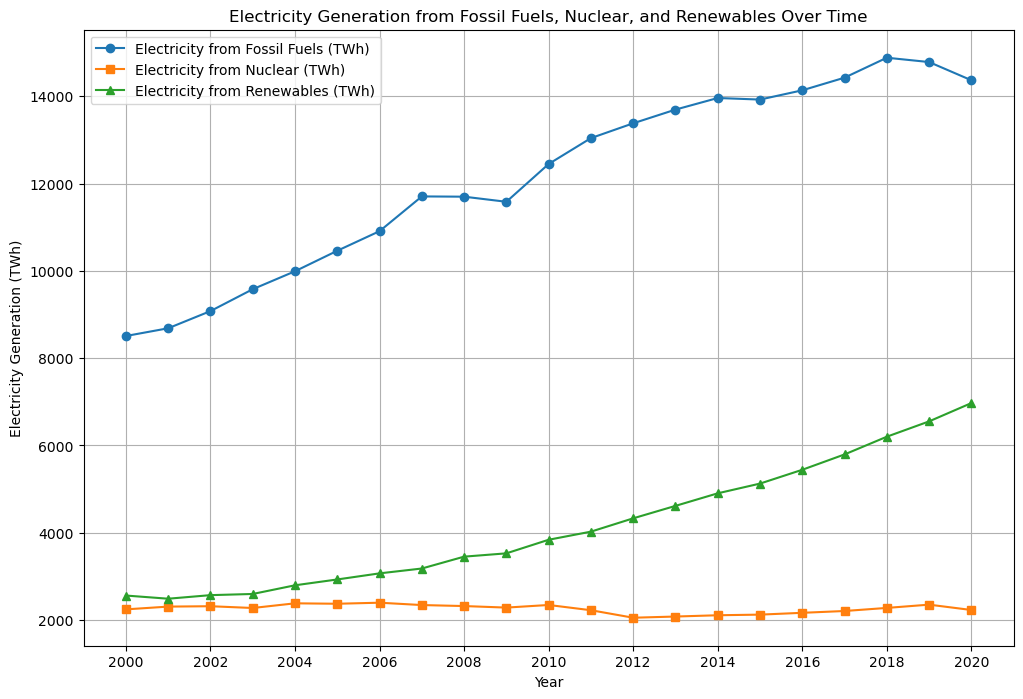

<Figure size 640x480 with 0 Axes>

In [108]:
# Define the output directory where you want to save the image
output_dir = "project-1-group17/Project Graphs"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Group the data by year
grouped = new_data_df.groupby('Year')

# Initialize empty lists to store data for each category
fossil_fuels_data = []
nuclear_data = []
renewables_data = []

# Iterate over each year and calculate the total electricity generation for each category
for year, data in grouped:
    fossil_fuels_total = data['Electricity from fossil fuels (TWh)'].sum()
    nuclear_total = data['Electricity from nuclear (TWh)'].sum()
    renewables_total = data['Electricity from renewables (TWh)'].sum()
    
    fossil_fuels_data.append(fossil_fuels_total)
    nuclear_data.append(nuclear_total)
    renewables_data.append(renewables_total)

# Create a line plot to show the growth in electricity generation from fossil fuels, nuclear, and renewables over time
plt.figure(figsize=(12, 8))
plt.plot(new_data_df['Year'].unique(), fossil_fuels_data, label='Electricity from Fossil Fuels (TWh)', marker='o')
plt.plot(new_data_df['Year'].unique(), nuclear_data, label='Electricity from Nuclear (TWh)', marker='s')
plt.plot(new_data_df['Year'].unique(), renewables_data, label='Electricity from Renewables (TWh)', marker='^')

plt.xlabel('Year')
plt.ylabel('Electricity Generation (TWh)')
plt.title('Electricity Generation from Fossil Fuels, Nuclear, and Renewables Over Time')
plt.legend()
plt.grid(True)

# Set x-axis ticks to show every 2 years increment
plt.xticks(range(2000, 2022, 2))

plt.show()

# Save the figure
plt.savefig(os.path.join(output_dir, "Electricity Generation from Energy Types Over Time"))


In [24]:
file_two = Path("../project-1-group17/countriescontinents.csv")
continent_data = pd.read_csv(file_two, encoding="UTF-8")
continent_data.head()

,Continent,Entity
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [25]:
continent_energy_data = pd.merge(new_data_df, continent_data, how="left", on=["Entity"])
continent_energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              3649 non-null   float64
 5   Financial flows to developing countries (US $)                    3649 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

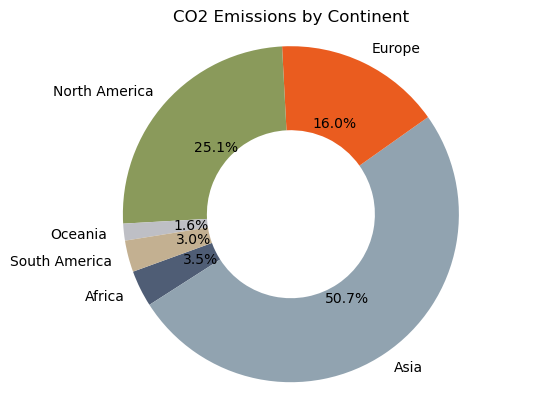

In [28]:
# Grouping the data by 'Continent' and summing the CO2 emissions values
grouped_data = continent_energy_data.groupby("Continent")["Value_co2_emissions_kt_by_country"].sum()

# Define colors for each continent
colors = ['#4F5D75', '#91A3B0', '#EA5C1F', '#8A9A5B', '#BEBFC5', '#C3B091']

# Plotting the data in a doughnut chart with custom colors
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    grouped_data,
    labels=grouped_data.index,
    autopct='%1.1f%%',
    startangle=200,
    wedgeprops=dict(width=0.5),  # width to create a doughnut effect
    colors=colors
)

ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("CO2 Emissions by Continent")

# Set text color and size for better readability
for autotext in autotexts:
    autotext.set_color('black')  
    autotext.set_fontsize(10)

plt.show()

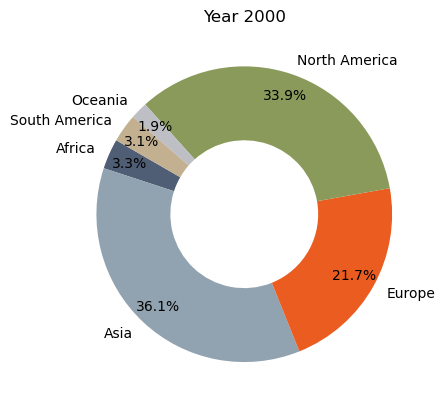

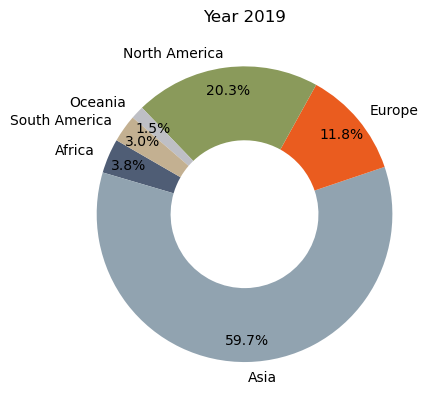

In [79]:
# Grouping data by year and continent
grouped_data_2000 = continent_energy_data[continent_energy_data['Year'] == 2000].groupby('Continent')['Value_co2_emissions_kt_by_country'].sum()
grouped_data_2019 = continent_energy_data[continent_energy_data['Year'] == 2019].groupby('Continent')['Value_co2_emissions_kt_by_country'].sum()

# Define colors for each continent
colors = ['#4F5D75', '#91A3B0', '#EA5C1F', '#8A9A5B', '#BEBFC5', '#C3B091']

# Function to plot doughnut chart
def plot_doughnut_chart(data, title, colors):
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(
        data, 
        labels=data.index, 
        startangle=150, 
        wedgeprops=dict(width=0.5), 
        colors=colors, 
        autopct='%1.1f%%', 
        pctdistance=0.85
    )
    for autotext in autotexts:
        autotext.set_color('black')  # Set the text color to black
        autotext.set_fontsize(10)  # Set the font size to 10
    plt.title(title)
    plt.show()

# Plot for the year 2000
plot_doughnut_chart(grouped_data_2000, 'Year 2000', colors)

# Plot for the year 2019
plot_doughnut_chart(grouped_data_2019, 'Year 2019', colors)

In [103]:
# Total CO2 emissions for the year 2000 and 2019
total_emissions_2000 = 97499280  # Placeholder value for total CO2 emissions in 2000
total_emissions_2019 = 116890000  # Placeholder value for total CO2 emissions in 2019

# Calculate the percentage improvement
percentage_improvement = ((total_emissions_2019 - total_emissions_2000) / total_emissions_2000) * 100

print(f"The percentage improvement in CO2 emissions from 2000 to 2019 is: {percentage_improvement:.2f}%")

The percentage improvement in CO2 emissions from 2000 to 2019 is: 19.89%


In [100]:
# Define CO2 emissions data for 2000 and 2019 as dictionaries
co2_emissions_2000 = {
    "Afghanistan": 760,
    "Albania": 3170,
    "Algeria": 80050,
    "Angola": 16200,
    # Additional entities go here...
    "United States": 5775810,
}

co2_emissions_2019 = {
    "Afghanistan": 6079.999924,
    "Albania": 4829.999924,
    "Algeria": 171250,
    "Angola": 25209.99908,
    # Additional entities go here...
    "United States": 4817720.215,
}

# Calculate percentage improvement or increase in CO2 emissions
percentage_improvement = {}

for entity in co2_emissions_2000.keys():
    if entity in co2_emissions_2019:
        emissions_2000 = co2_emissions_2000[entity]
        emissions_2019 = co2_emissions_2019[entity]
        
        # Calculate the percentage improvement
        if emissions_2000 == 0:
            improvement = float('inf') if emissions_2019 > 0 else 0
        else:
            improvement = ((emissions_2019 - emissions_2000) / emissions_2000) * 100
        
        percentage_improvement[entity] = improvement

# Print the results
for entity, improvement in percentage_improvement.items():
    print(f"{entity}: {improvement:.2f}% improvement")


Afghanistan: 700.00% improvement
Albania: 52.37% improvement
Algeria: 113.93% improvement
Angola: 55.62% improvement
United States: -16.59% improvement


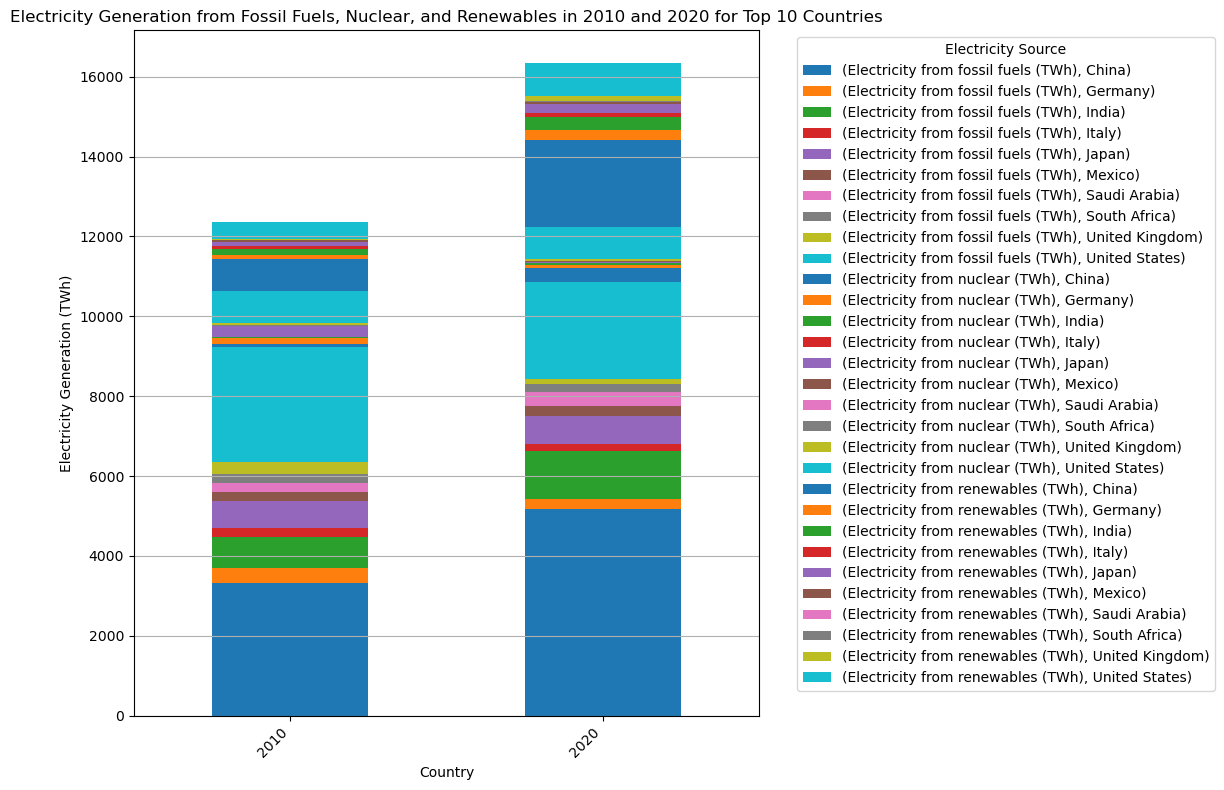

In [98]:
# Filter the DataFrame to include data for the top 10 countries based on electricity generation from fossil fuels
top_10_countries = new_data_df.groupby('Entity')['Electricity from fossil fuels (TWh)'].sum().nlargest(10).index

# Filter the DataFrame to include data for the top 10 countries and years 2010 and 2020
top_10_data = new_data_df[(new_data_df['Entity'].isin(top_10_countries)) & (new_data_df['Year'].isin([2010, 2020]))]

# Group the data by year and country and sum the electricity generation from different sources
grouped_data = top_10_data.groupby(['Year', 'Entity'])[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']].sum()

# Create a bar chart to compare electricity generation from different sources for the top 10 countries in 2010 and 2020
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.unstack().plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Country')
plt.ylabel('Electricity Generation (TWh)')
plt.title('Electricity Generation from Fossil Fuels, Nuclear, and Renewables in 2010 and 2020 for Top 10 Countries')
plt.legend(title='Electricity Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

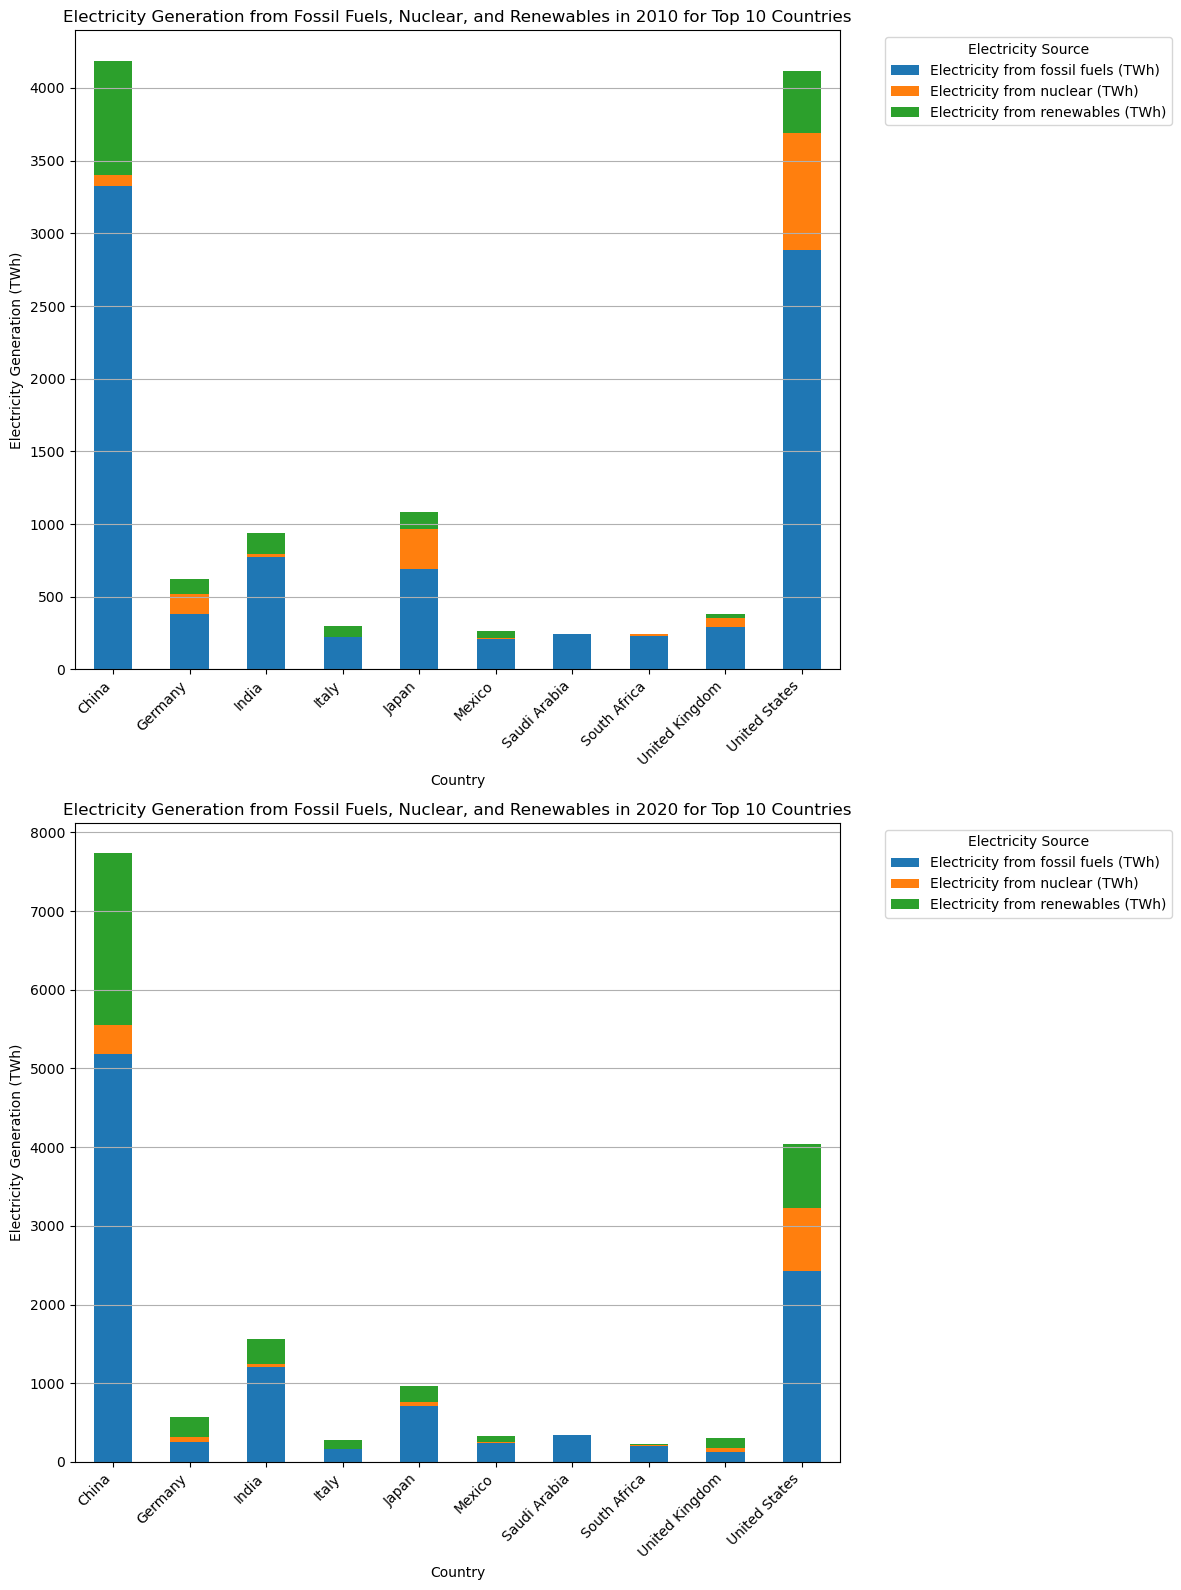

In [102]:
# Filter the DataFrame to include data for the top 10 countries based on electricity generation from fossil fuels
top_10_countries = new_data_df.groupby('Entity')['Electricity from fossil fuels (TWh)'].sum().nlargest(10).index

# Filter the DataFrame to include data for the top 10 countries and years 2010 and 2020
top_10_data = new_data_df[(new_data_df['Entity'].isin(top_10_countries)) & (new_data_df['Year'].isin([2010, 2020]))]

# Group the data by year and country and sum the electricity generation from different sources
grouped_data = top_10_data.groupby(['Year', 'Entity'])[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']].sum()

# Create subplots for each year (2010 and 2020)
fig, axs = plt.subplots(2, 1, figsize=(12, 16))

for idx, year in enumerate([2010, 2020]):
    ax = axs[idx]
    data_year = grouped_data.loc[year]
    
    # Create a bar chart for each year to compare electricity generation from different sources
    bar_plot = data_year.plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel('Country')
    ax.set_ylabel('Electricity Generation (TWh)')
    ax.set_title(f'Electricity Generation from Fossil Fuels, Nuclear, and Renewables in {year} for Top 10 Countries')
    ax.legend(title='Electricity Source', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xticks(range(len(data_year.index)))
    ax.set_xticklabels(data_year.index.get_level_values('Entity'), rotation=45, ha='right')
    ax.grid(axis='y')

# Ensure the layout fits within the figure area
plt.tight_layout()
plt.show()

In [34]:
continent_energy_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              3649 non-null   float64
 5   Financial flows to developing countries (US $)                    3649 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

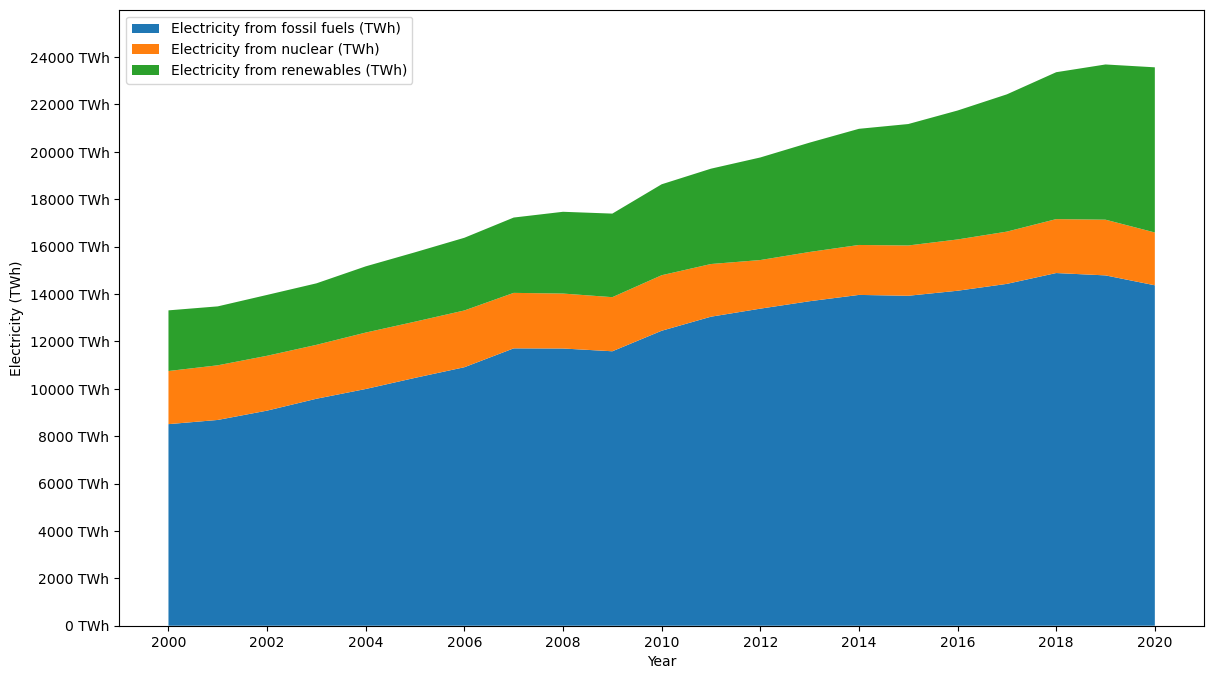

In [106]:
# Filter the DataFrame for the years 2000 through 2019
df_subset = continent_energy_data[(continent_energy_data['Year'] >= 2000) & (continent_energy_data['Year'] <= 2020)]

# Aggregate the data by summing the electricity generation for each source across all continents for each year
aggregated_data = df_subset.groupby('Year')[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']].sum()

# Enlarge the figure size
plt.figure(figsize=(14, 8))

# Plot the stackplot
plt.stackplot(aggregated_data.index, aggregated_data.values.T, labels=aggregated_data.columns)

# Set specific y-axis limits
plt.ylim(0, 26000)  # Adjust the limits based on your data

# Customize y-axis ticks in 2000 TWh increments
y_ticks = range(0, 26000, 2000)
plt.yticks(y_ticks, [f'{tick} TWh' for tick in y_ticks])  # Display ticks with TWh label

plt.xlabel('Year')
plt.ylabel('Electricity (TWh)')
# plt.title('Electricity Generation by Source (2000-2019)')
plt.legend()

# Move the legend to the upper left corner
plt.legend(loc='upper left')

# Set x-axis ticks to show every 2 years increment
plt.xticks(range(2000, 2022, 2))

plt.show()
